# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



transformation ideas
- pierce county -- might want to compute bedrooms divided by bathroom, could better understand the ratio
- airbnb - for price -- string replace commas and coerce to numeric, plug in the mean for review scores or drop


lasso throws away highly correlated predictors

In [ ]:
# 1. Clean the data and perform some EDA and visualization to get to know the data set.
# 2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split


df = pd.read_csv('/content/cars_hw.csv')

In [10]:
df.head() # data seems pretty clean

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [25]:
df['Body_Type'].unique()

array(['suv', 'hatchback', 'muv', 'sedan', 'crossover'], dtype=object)

In [27]:
df.isnull().sum()

,0
Unnamed: 0,0
Make,0
Make_Year,0
Color,0
Body_Type,0
Mileage_Run,0
No_of_Owners,0
Seating_Capacity,0
Fuel_Type,0
Transmission,0


<Axes: >

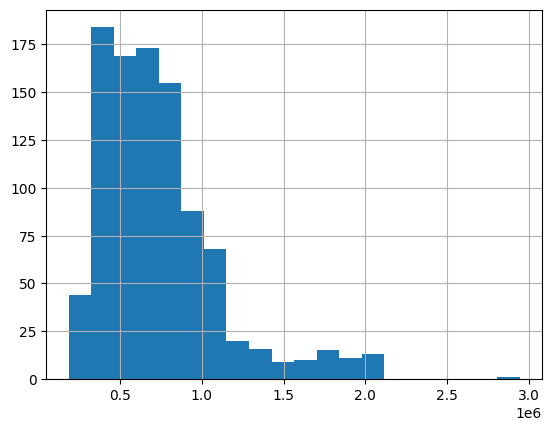

In [11]:
df['Price'].hist(bins=20)

<Axes: >

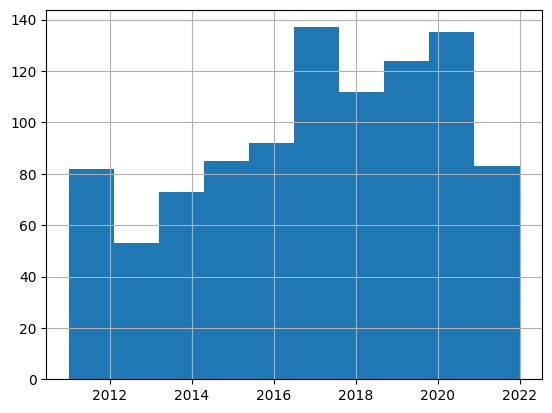

In [35]:
df['Make_Year'].hist()

In [ ]:
# 3. Implement an 80/20 train-test split. Put the test data aside.

In [ ]:
from sklearn.model_selection import train_test_split
y = df['Price'] # Create target variable vector
X = df.loc[:,['Make_Year']] # Create feature matrix

# might want to take log or inverse hyperbolic sine of price

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes


Z_train = pd.concat([X_train['Make_Year'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

In [ ]:
# 4. Build some simple linear models that include no transformations or interactions.
# Fit them, and determine their RMSE and  𝑅2  on the both the training and test sets.
# Which of your models does the best?

In [22]:
def slr(x,y): # Single Linear Regression Function
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

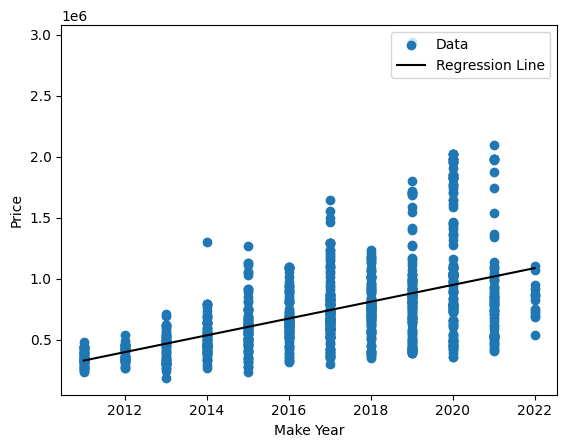

In [41]:
x = df['Make_Year']
y = df['Price']

coef = slr(x,y)

y_hat = coef['b0']+coef['b1']*x
plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black')
plt.xlabel("Make Year")
plt.ylabel("Price")
plt.legend(loc='upper right')

plt.show()

In [ ]:
# 5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the
# features of the asset determine its value. Determine its RMSE and  𝑅2  on the training and test sets.
# How does the more complex model your build compare to the simpler ones?

In [ ]:
# 6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?

In [ ]:
# 7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive
# features. Which does it select? What are the RMSE and  𝑅2 ? We'll cover the Lasso later in detail in class.